In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
import scipy 
from scipy import stats
import json
import sklearn
import re

In [3]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
filename = "creditcard.csv"
df = pd.read_csv(filename)
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


The datasets contains transactions made by credit cards in September 2013 by european cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, the original features were not provided and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise. 

Analyzing the data

In [5]:
df.shape

(284807, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

The above desctiption tells about the value datatypes present in the dataset in each column. <br>
The target class is represented by the "class" column which takes 0 and 1 values

In [7]:
df.isnull().values.any()

False

There are no NaN or missing values in the dataset

In [8]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
df['Class'].value_counts()/df.shape[0]*100 

0    99.827251
1     0.172749
Name: Class, dtype: float64

Out of all the values present, there are 99.8% non fraud records and 0.17% fraud records. <br>
This clearly shows the imbalance in the dataset and we can't directly proceed with model building with this dataset as results will be biased and inaccurate

In [11]:
print('Non-Fraud Transaction is', round(df['Class'].value_counts()[0]/len(df)*100, 2),'% of the dataset')
print('Fraud Transaction is', round(df['Class'].value_counts()[1]/len(df)*100, 2),'% of the dataset')

Non-Fraud Transaction is 99.83 % of the dataset
Fraud Transaction is 0.17 % of the dataset


Text(0.5, 1.0, 'Class Distribution')

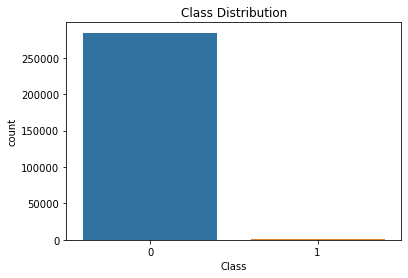

In [12]:
# Plotting the difference betweeen fraud and non-fraud transactions
sns.countplot(df['Class'])
plt.title('Class Distribution')

Text(0.5, 1.0, 'Distribution of Time')

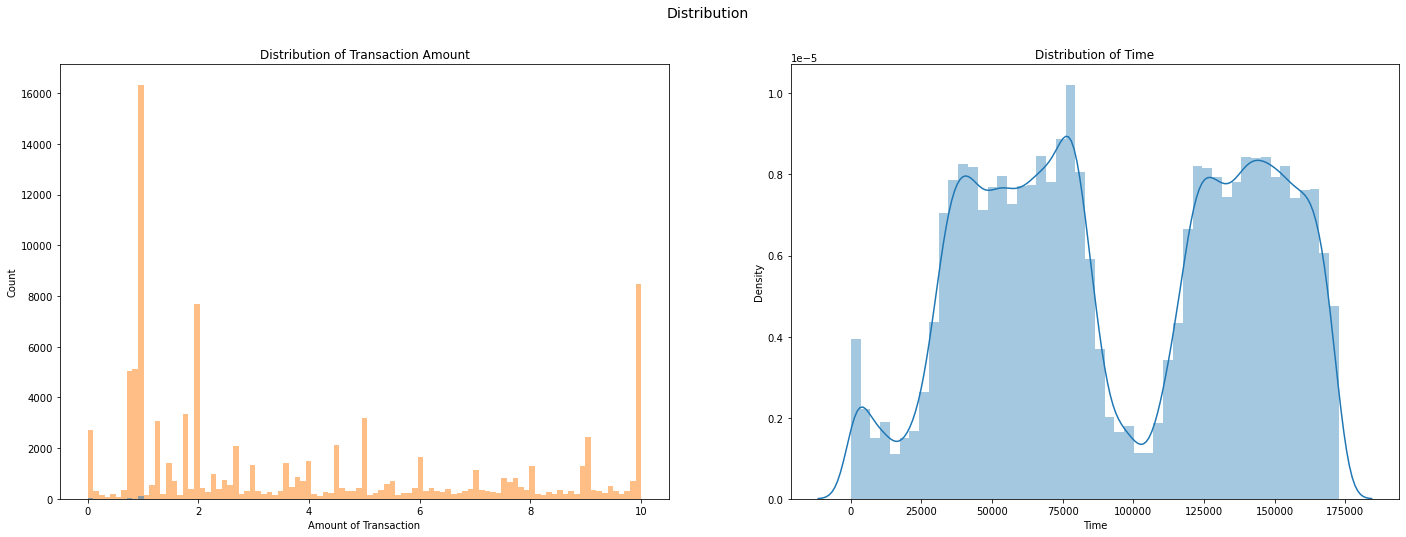

In [13]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (24, 8))

f.suptitle('Distribution', fontsize = 14)


# Transaction Amount Distribution
bins = np.linspace(0, 10, 100)
data_nf = df[df['Class'] == 0]
data_f = df[df['Class'] == 1]

ax1.hist(data_nf['Amount'], bins = bins, label = 'Non-Fraud', alpha = 0.5, color = 'tab:orange')
ax1.hist(data_f['Amount'], bins = bins, label = 'Fraud', alpha = 0.5, color = 'tab:blue')

ax1.set_xlabel('Amount of Transaction')
ax1.set_ylabel('Count')
ax1.set_title('Distribution of Transaction Amount')

# Time Distribution
ax2 = sns.distplot(df['Time'])
ax2.set_title('Distribution of Time')

### Scaling

The "amount" and "time" values are bigger than the other value in each columns. These values have to be scaled so that the model which will be built performs efficiently.   

In [14]:
dataset = df.copy()

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [16]:
scaling = scaler.fit_transform(np.array(dataset['Amount']).reshape(-1, 1))

In [17]:
scaling2 = scaler.fit_transform(np.array(dataset['Time']).reshape(-1, 1))

In [18]:
dataset['Amount'] = scaling
dataset['Time'] = scaling2

### Visualizing the Correlation

Since the dataset is imbalanced, correlation won't be there much <br>
To handle the imbalance in the dataset, SMOTE is performed. <br>
SMOTE is performed just to see the correlation between each feature <br>

In [19]:
# Determine X and y
X = dataset.drop('Class', axis = 1)
y = dataset['Class']

In [20]:
from collections import Counter
from imblearn.combine import SMOTETomek

In [21]:
smk = SMOTETomek(random_state = 42)

In [22]:
X_smk, y_smk = smk.fit_resample(X, y)

In [23]:
print(Counter(y))

Counter({0: 284315, 1: 492})


In [24]:
print(Counter(y_smk))

Counter({0: 284315, 1: 284315})


In [25]:
# Make a train set dataframe for SMOTE
df_smote = X_smk
df_smote['Class'] = y_smk

In [26]:
# Reset the Index
df_smote['index'] = [i for i in range(len(df_smote))]
df_smote = df_smote.set_index('index')

In [27]:
X_smk = X_smk.drop(['index', 'Class'], axis = 1)

Text(0.5, 1.0, 'Class Distribution')

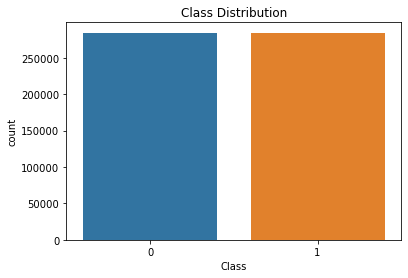

In [28]:
# Plotting the difference betweeen fraud and non-fraud transactions after performing SMOTE
sns.countplot(df_smote['Class'])
plt.title('Class Distribution')

Text(0.5, 1.0, 'Data after SMOTE')

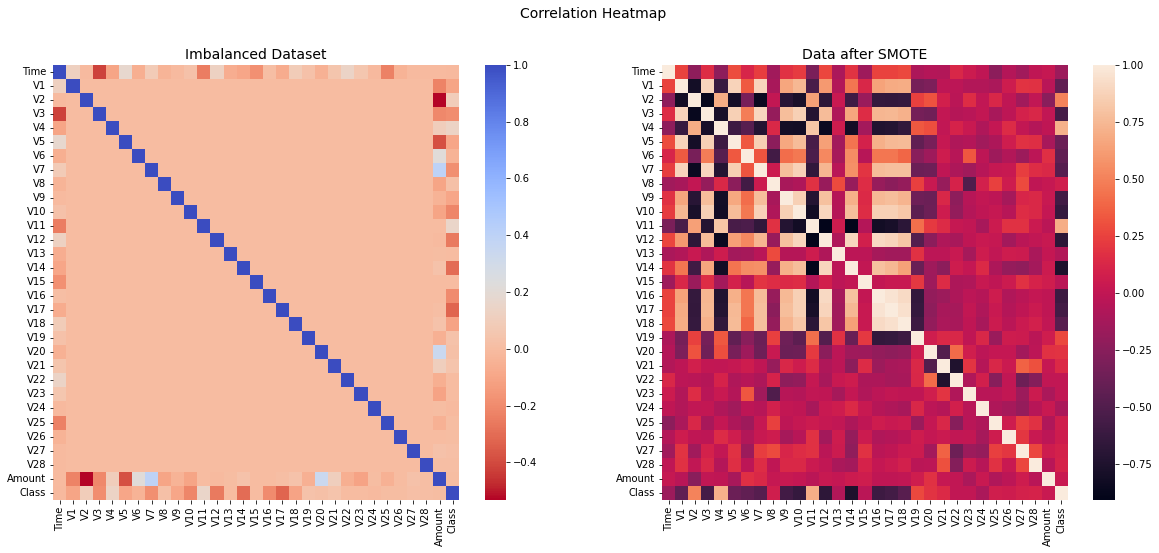

In [29]:
# Plotting a Heatmap to see the correlation between the features
fig, axes = plt.subplots(1, 2, sharex = True, figsize = (20, 8))
fig.suptitle('Correlation Heatmap', fontsize = 14)

# Imbalanced Dataset
sns.heatmap(dataset.corr(), ax = axes[0], cmap = 'coolwarm_r', annot_kws = {'size': 20})
axes[0].set_title('Imbalanced Dataset', fontsize = 14)

# Data after SMOTE
sns.heatmap(df_smote.corr(), ax = axes[1])
axes[1].set_title('Data after SMOTE', fontsize = 14)


Removing Outliers

Checking for features that have a positive or negative correlation

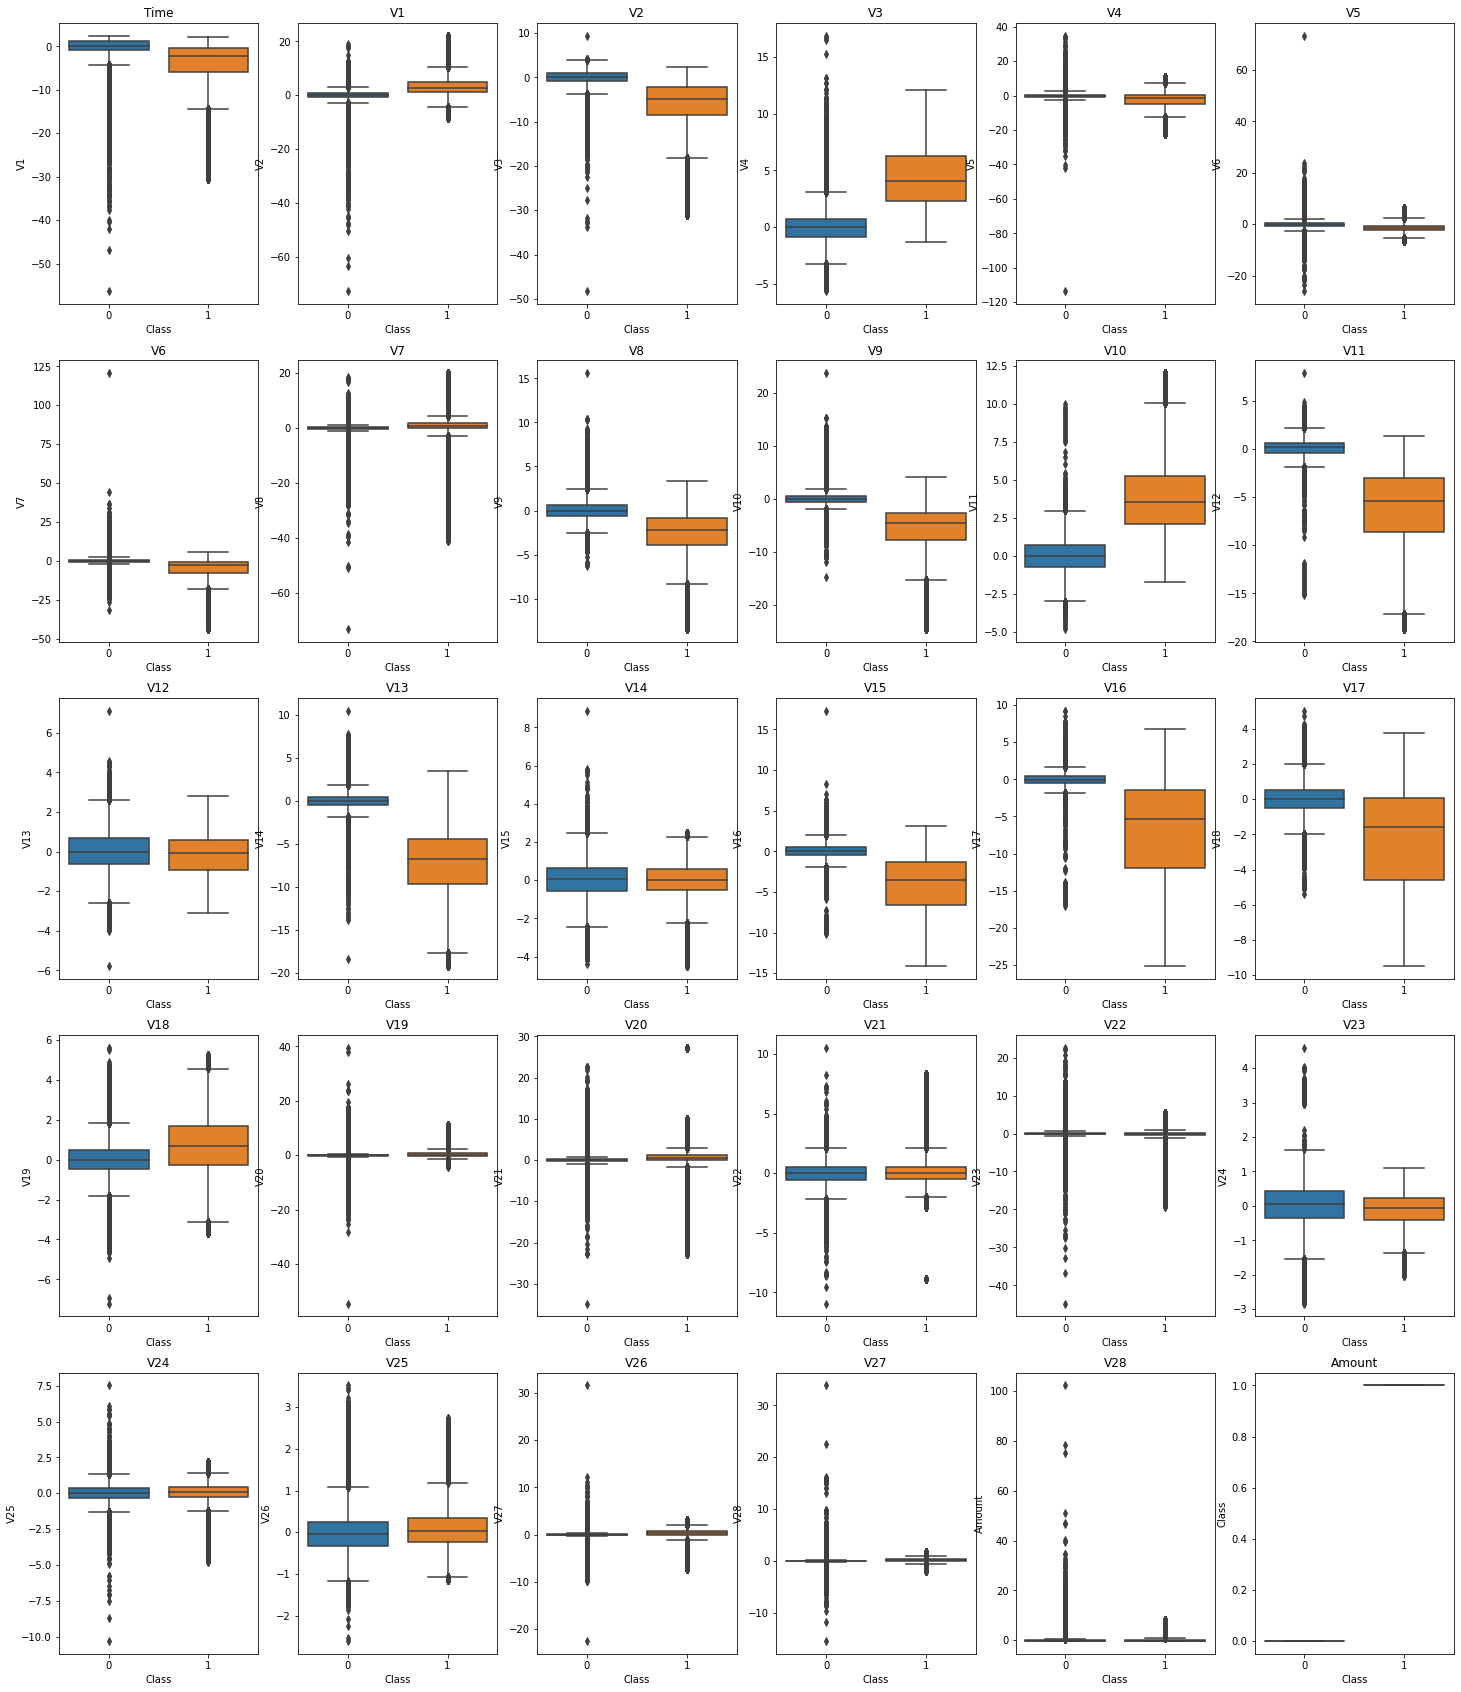

In [30]:
col = [i for i in df_smote.columns if i != 'Class']

n_rows = 5
n_cols = 6
count = 0
col_num = 1

plt.subplots(n_rows, n_cols, figsize = (25, 30))

for i in range(n_rows):
    for j in range(n_cols):
        plt.subplot(n_rows, n_cols, count + 1)
        sns.boxplot(y = df_smote.iloc[:, col_num], x = df_smote['Class'])
        plt.title(col[col_num - 1])
        if(col_num < df.shape[1]):
            count = count + 1
            col_num = col_num + 1
            

plt.show()

From the boxplots, it can be observed:

<b> Negative Correlation: </b> Time, V2, V6, V8, V9, V11, V13, V15, V16, V17


<b> Postiive Correlation: </b> V1, V3, V10, V18

And it is visible we can see that feature that have a high correlation with the class is V2, V3, V8, V10, V11, V13, V15, V16, V17, V18 so we will remove outliers from this dataset.

In [31]:
out = ['V2', 'V3', 'V8', 'V10', 'V11', 'V13', 'V15', 'V16', 'V17', 'V18']

new_df = df_smote.copy()

for i in out:
    fraud = new_df[i].loc[new_df['Class'] == 1].values
    q25, q75 = np.percentile(fraud, 25), np.percentile(fraud, 75)

    iqr = q75 - q25

    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off

    outliers = [x for x in fraud if x < lower or x > upper]

    #Drop outliers from dataset
    new_df = new_df.drop(new_df[(new_df[i] > upper) | (new_df[i] < lower)].index)

Text(0.5, 1.0, 'After Removing Outliers')

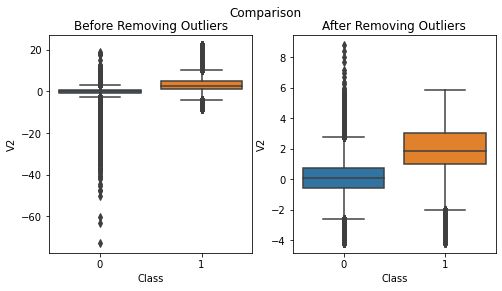

In [32]:
# Comparing the  Dataset
fig, axes = plt.subplots(1, 2, sharex = True, figsize = (8, 4))
fig.suptitle('Comparison')

sns.boxplot(x = "Class", y = "V2", data = df_smote, ax = axes[0])
axes[0].set_title('Before Removing Outliers')

sns.boxplot(x = "Class", y = "V2", data = new_df, ax = axes[1])
axes[1].set_title('After Removing Outliers')

Text(0.5, 1.0, 'After')

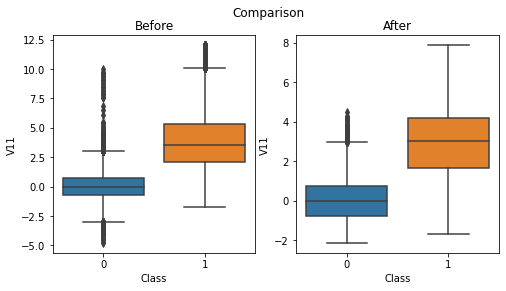

In [33]:
#Compare dataset
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(8,4))
fig.suptitle('Comparison')

sns.boxplot(x="Class", y='V11', data=df_smote,ax=axes[0])
axes[0].set_title('Before')

sns.boxplot(x="Class", y='V11', data=new_df,ax=axes[1])
axes[1].set_title('After')

Text(0.5, 1.0, 'Class Distribution')

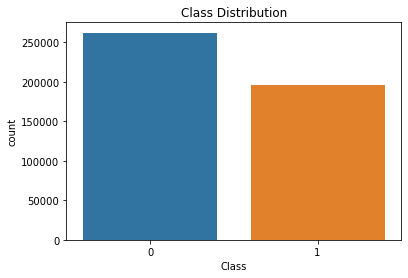

In [34]:
#Plotting the difference betweeen fraud and non-fraud transactions
sns.countplot(new_df['Class'])
plt.title('Class Distribution')

In [35]:
print('**Before Removing Outliers**')
print('Non-Fraud Transaction:   ', df_smote['Class'].value_counts()[0])
print('Fraud Transaction:       ', df_smote['Class'].value_counts()[1])
print('\n')
print('**After Removing Outliers**')
print('Non-Fraud Transaction:   ', new_df['Class'].value_counts()[0])
print('Fraud Transaction:       ', new_df['Class'].value_counts()[1])
print('\n')
print('**Reduce Number**')
print('Non-Fraud Transaction:   ', df_smote['Class'].value_counts()[0] - new_df['Class'].value_counts()[0])
print('Fraud Transaction:       ', df_smote['Class'].value_counts()[1] - new_df['Class'].value_counts()[1])

**Before Removing Outliers**
Non-Fraud Transaction:    284315
Fraud Transaction:        284315


**After Removing Outliers**
Non-Fraud Transaction:    262219
Fraud Transaction:        196315


**Reduce Number**
Non-Fraud Transaction:    22096
Fraud Transaction:        88000


# Split The Dataset

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state = 42)

In [39]:
# Make a train set dataframe for SMOTE
train_set = X_train
train_set['Class'] = y_train

In [40]:
# Reset the index
train_set['index'] = [i for i in range(len(train_set))]
train_set = train_set.set_index('index')

In [41]:
X_train = X_train.drop(['index','Class'],axis=1)

In [46]:
from sklearn.linear_model import LogisticRegression

In [42]:
# Split dataset
X = dataset.drop('Class', axis=1)
y = dataset['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state = 42)

In [43]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values

In [44]:
y_train = y_train.values
y_test = y_test.values

In [47]:
classifiers = {
    "LogisiticRegression": LogisticRegression()
}

In [48]:
# Implement the model into the train dataset
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.metrics import average_precision_score

for key, classifier in classifiers.items():
    # Fit the data into the model
    classifier.fit(X_train, y_train)
    
    # Test the model on the test dataset 
    # Calculate the average precision-recall score
    y_score = classifier.predict(X_test)
    average_precision = average_precision_score(y_test, y_score)
    print(key,'Average precision-recall score: {0:0.2f}'.format(average_precision))
    
    # Classification report
    classification_report(y_test, y_score)
    print(key,'Classification_report')
    print(classification_report(y_test, y_score))
    
    # Cross Validation score
    training_score = cross_val_score(classifier, X_test, y_test, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")
    
    # Accuracy Score
    acc_score = accuracy_score(y_test, y_score)
    print(key,'Accuracy Score',acc_score)

    

LogisiticRegression Average precision-recall score: 0.50
LogisiticRegression Classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227459
           1       0.87      0.57      0.69       387

    accuracy                           1.00    227846
   macro avg       0.93      0.79      0.85    227846
weighted avg       1.00      1.00      1.00    227846

Classifiers:  LogisticRegression Has a training score of 100.0 % accuracy score
LogisiticRegression Accuracy Score 0.9991266030564504
